In [0]:
%matplotlib inline

import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import TruncatedSVD

from joblib import dump, load

import xgboost as xgb
import spacy

In [0]:
triplets_file = 'https://static.turi.com/datasets/millionsong/10000.txt'
songs_metadata_file = 'https://static.turi.com/datasets/millionsong/song_data.csv'
song_df_1 = pd.read_table(triplets_file,header=None)
song_df_1.columns = ['user_id', 'song_id', 'listen_count']
song_df_2 =  pd.read_csv(songs_metadata_file)
song_df = pd.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on="song_id", how="left")
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [0]:
song_meta = pd.read_csv('SpotifyAudioFeaturesApril2019.csv')
song_meta.shape

(130663, 17)

(130663, 17)

In [0]:
songs_unique = song_meta['track_id'].unique()
len(songs_unique)

130326

In [0]:
# Let's try some PCA to do a sensible KMeans Clustering model
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

km_features = song_meta.drop(['artist_name', 'track_id', 'track_name'], axis=1)

In [0]:
pca = PCA(n_components=2)
km_features = StandardScaler().fit_transform(km_features)
principalComponents = pca.fit_transform(km_features)
principalDF = pd.DataFrame(data = principalComponents
                           , columns = ['x', 'y'])

In [0]:
principalDF.head()

,x,y
0,0.453053,-0.104844
1,-1.098966,-0.242889
2,2.342625,1.450723
3,-2.529258,-0.103159
4,3.649586,-1.247047


In [0]:
# Looks like I'd hoped

[[-1.38592187 -1.11392998]
 [ 1.06671163  0.1984754 ]
 [-0.43711835  0.05493884]
 [ 2.53913284 -1.0226833 ]
 [-1.15924187  1.28729396]
 [ 3.33527867  1.14696833]
 [-1.7096186   0.02612003]
 [ 0.20107067  2.25781043]
 [ 0.25472347 -1.45059493]
 [ 4.59901776 -0.21115117]]


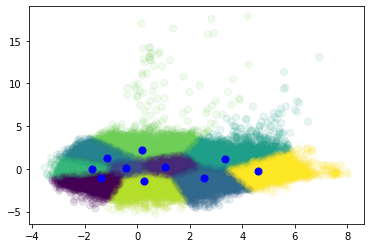

In [0]:
kmeans = KMeans(n_clusters=10).fit(principalDF)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(principalDF['x'], principalDF['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.1)
plt.scatter(centroids[:, 0], centroids [:, 1], c='blue', s=50)